In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import nia22
import cv2
import json

In [3]:
label = np.load('../../RITnet_data/0try/labels/NIA_EYE_U1_053_VR_IR_F_REYE_0901.npy')

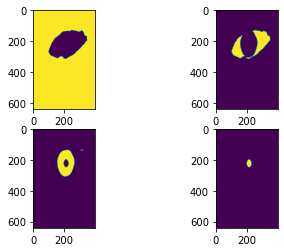

In [4]:
fig, axs = plt.subplots(2,2)
axs = axs.ravel()
axs[0].imshow(label==0)
axs[1].imshow(label==1)
axs[2].imshow(label==2)
axs[3].imshow(label==3)
plt.show()

###

In [8]:
# Load annotation
ddir = "../../SampleData/"

fn_json = ddir + "json/mobile_C_D_H1_01.json"
fn_png  = fn_json.replace("json", "png")

img = cv2.cvtColor(cv2.imread(fn_png), cv2.COLOR_BGR2RGB)

anno = json.load(open(fn_json))

#eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])
eye = nia22.eyes.Eye(anno["annotations"])

area, cropped = nia22.eyes.crop_eye(img, np.array(eye.l_eyelid['points']))

In [17]:
# Make label map
from nia22.eyes import mask_one_eye, crop_eye

cropped, mask = mask_one_eye(img, eye, "r")

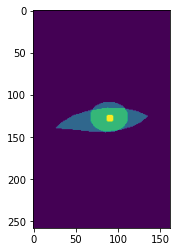

In [10]:
plt.imshow(mask)

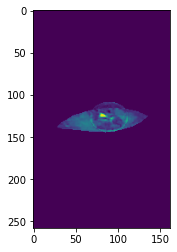

In [11]:
plt.imshow(cropped[:,:,2] * mask)

In [12]:
# train with my new label map 
from glob import glob
import os

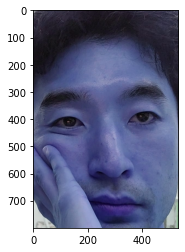

In [52]:
ddir = "../../SampleData/"

fn_json = ddir + "json/mobile_C_D_H1_01.json"

flist = glob(ddir+"json/mobile_C_D_H1_*.json")
flist.sort()

for fn_json in flist:
    fn_png  = fn_json.replace("json", "png")
    fn = fn_json.split("/")[-1].split("json")[0]
    
    img = cv2.imread(fn_png)
    #img = cv2.cvtColor(cv2.imread(fn_png), cv2.COLOR_BGR2RGB)
    anno = json.load(open(fn_json))
    # temporary version
    eye = nia22.eyes.Eye(anno["annotations"])
    
    
    eyelid = np.array(eye.l_eyelid['points'])
    hw = int(eye.r_center['points'][0][0] - eye.l_center['points'][0][0])
    hh = int(min([1080/2,1.5*hw]))

    xl = eye.l_center['points'][0][0] - hw
    xr = eye.r_center['points'][0][0] + hw
    yl = eye.r_center['points'][0][0] + hh
    yr = eye.r_center['points'][0][0] - hh

    dx = abs(xl - xr)
    dy = abs(yl - yr)

    xc = int(np.mean([eye.r_center['points'][0][0], eye.l_center['points'][0][0]]))
    yc = int(np.mean([eye.r_center['points'][0][1], eye.l_center['points'][0][1]]))

    #hw = int(magnify*dx/2)
    #hh = int(hw*ratio)

    # X-Y transposed
    cropped = img[yc-hh:yc+hh, xc-hw:xc+hw, :] 
    plt.imshow(cropped)

    cv2.imwrite(fn+"face.png", cropped)
        
#fn_png  = fn_json.replace("json", "png")
#img = cv2.cvtColor(cv2.imread(fn_png), cv2.COLOR_BGR2RGB)
#anno = json.load(open(fn_json))

#eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])
#eye = nia22.eyes.Eye(anno["annotations"])

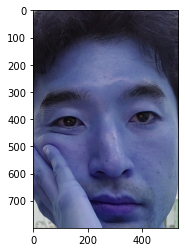

In [51]:
cv2.imwrite(fn+"l.png", cropped)

True

In [42]:
print(xc, yc, hw, hh)

1144 536 265.5 398


In [40]:
img.shape

(1080, 1920, 3)

In [39]:
hw

265.5

In [38]:
xc

1144

In [34]:
img.shape

(1080, 1920, 3)

In [ ]:
cropped, mask = mask_one_eye(img, eye, "r")

In [16]:
eye

[{'key': 0, 'label': 'r_iris', 'points': [[1256, 509], [1302, 549]], 'shape': 'Ellipse', 'rotate': 0.1, 'rx': 23, 'ry': 20, 'cx': 1279, 'cy': 529}, {'key': 1, 'label': 'l_iris', 'points': [[988, 528], [1035, 565]], 'shape': 'Ellipse', 'rx': 23.5, 'ry': 18.5, 'cx': 1011.5, 'cy': 546.5, 'rotate': 0.4}, {'key': 2, 'label': 'r_eyelid', 'points': [[1222, 547], [1228, 548], [1241, 548], [1261, 550], [1281, 550], [1301, 546], [1314, 540], [1322, 535], [1330, 526], [1325, 523], [1318, 519], [1306, 514], [1285, 512], [1264, 516], [1243, 526], [1229, 538]], 'shape': 'Polygon'}, {'key': 3, 'label': 'l_eyelid', 'points': [[960, 549], [970, 557], [979, 562], [993, 566], [1012, 566], [1031, 562], [1048, 557], [1059, 554], [1065, 552], [1057, 545], [1041, 535], [1020, 528], [1000, 529], [981, 535], [971, 541], [965, 546]], 'shape': 'Polygon'}, {'key': 4, 'label': 'r_center', 'labelNum': 0, 'points': [[1277, 528]], 'shape': 'Point'}, {'key': 5, 'label': 'l_center', 'labelNum': 0, 'points': [[1011.5, 5

In [26]:
# data dir
dout_dir = "../../dataset_rit_nia/"
os.makedirs(dout_dir, exist_ok=True)

# cropped img 
png_dir = dout_dir+'images/'
os.makedirs(png_dir, exist_ok=True)

# npy label
label_dir = dout_dir+'labels/'
os.makedirs(label_dir, exist_ok=True)

idx=0

#keep = []
for fn_json in flist[2:40:]:
    fn_png  = fn_json.replace("json", "png")
    fn = fn_json.split("/")[-1].split("json")[0]
    
    #img = cv2.cvtColor(cv2.imread(fn_png), cv2.COLOR_BGR2RGB)
    try:
        img = cv2.imread(fn_png)
        anno = json.load(open(fn_json))
        # temporary version
        eye = nia22.eyes.Eye(anno["annotations"])
        # Final version
        #eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])
        cropped, mask = mask_one_eye(img, eye, "r")
        cv2.imwrite(png_dir+fn+"r.png", cropped)
        np.save(label_dir+fn+"r.npy",mask)

        #keep.append([cropped, mask])
        
        cropped, mask = mask_one_eye(img, eye, "l")
        cv2.imwrite(png_dir+fn+"l.png", cropped)
        np.save(label_dir+fn+"l.npy" ,mask)
        #keep.append([cropped, mask])
    except:
        print("error")

가끔 마스크별로 이미지 크기가 다른 경우가 발생함

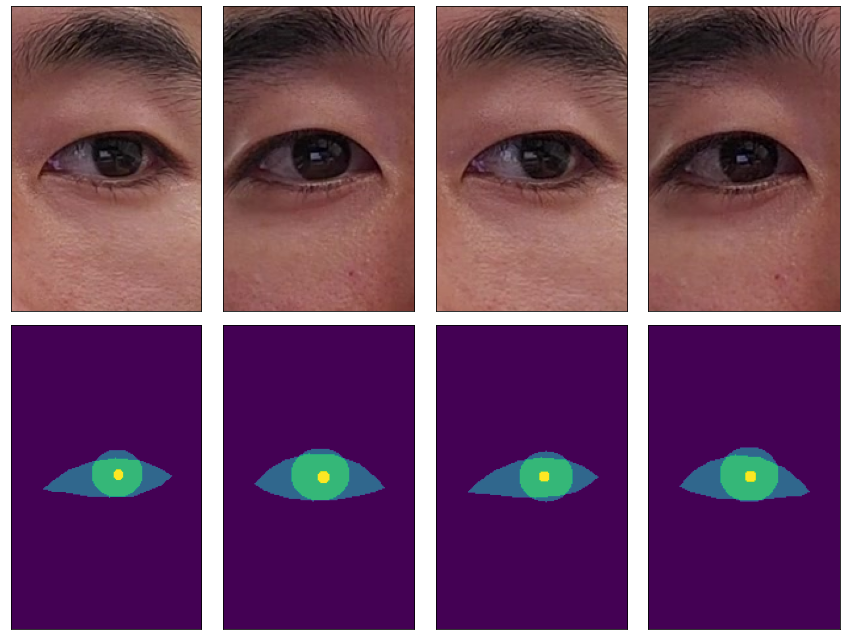

In [47]:
fig, axs =plt.subplots(2,4)
fig.set_size_inches(12,9)
for i, kk in enumerate(keep[:4]):
    cropped, mask = kk
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    axs[0,i].imshow(cropped)
    axs[1,i].imshow(mask)
    
for ax in axs.ravel():
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.savefig("test.png", bbox_inches='tight')

In [8]:
mask = np.load('../../dataset_rit_nia/train/labels/mobile_C_D_H1_32.l.npy')

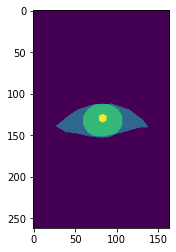

In [9]:
plt.imshow(mask)

In [16]:
mask.dtype

dtype('float64')